In [1]:
import sklearn
import pandas as pd
import numpy as np

df = pd.read_csv('housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# PART I  EDA

In [2]:
print('Number of rows of data: ', df.shape[0])
print('Number of columns of data: ', df.shape[1])

Number of rows of data:  506
Number of columns of data:  14


//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


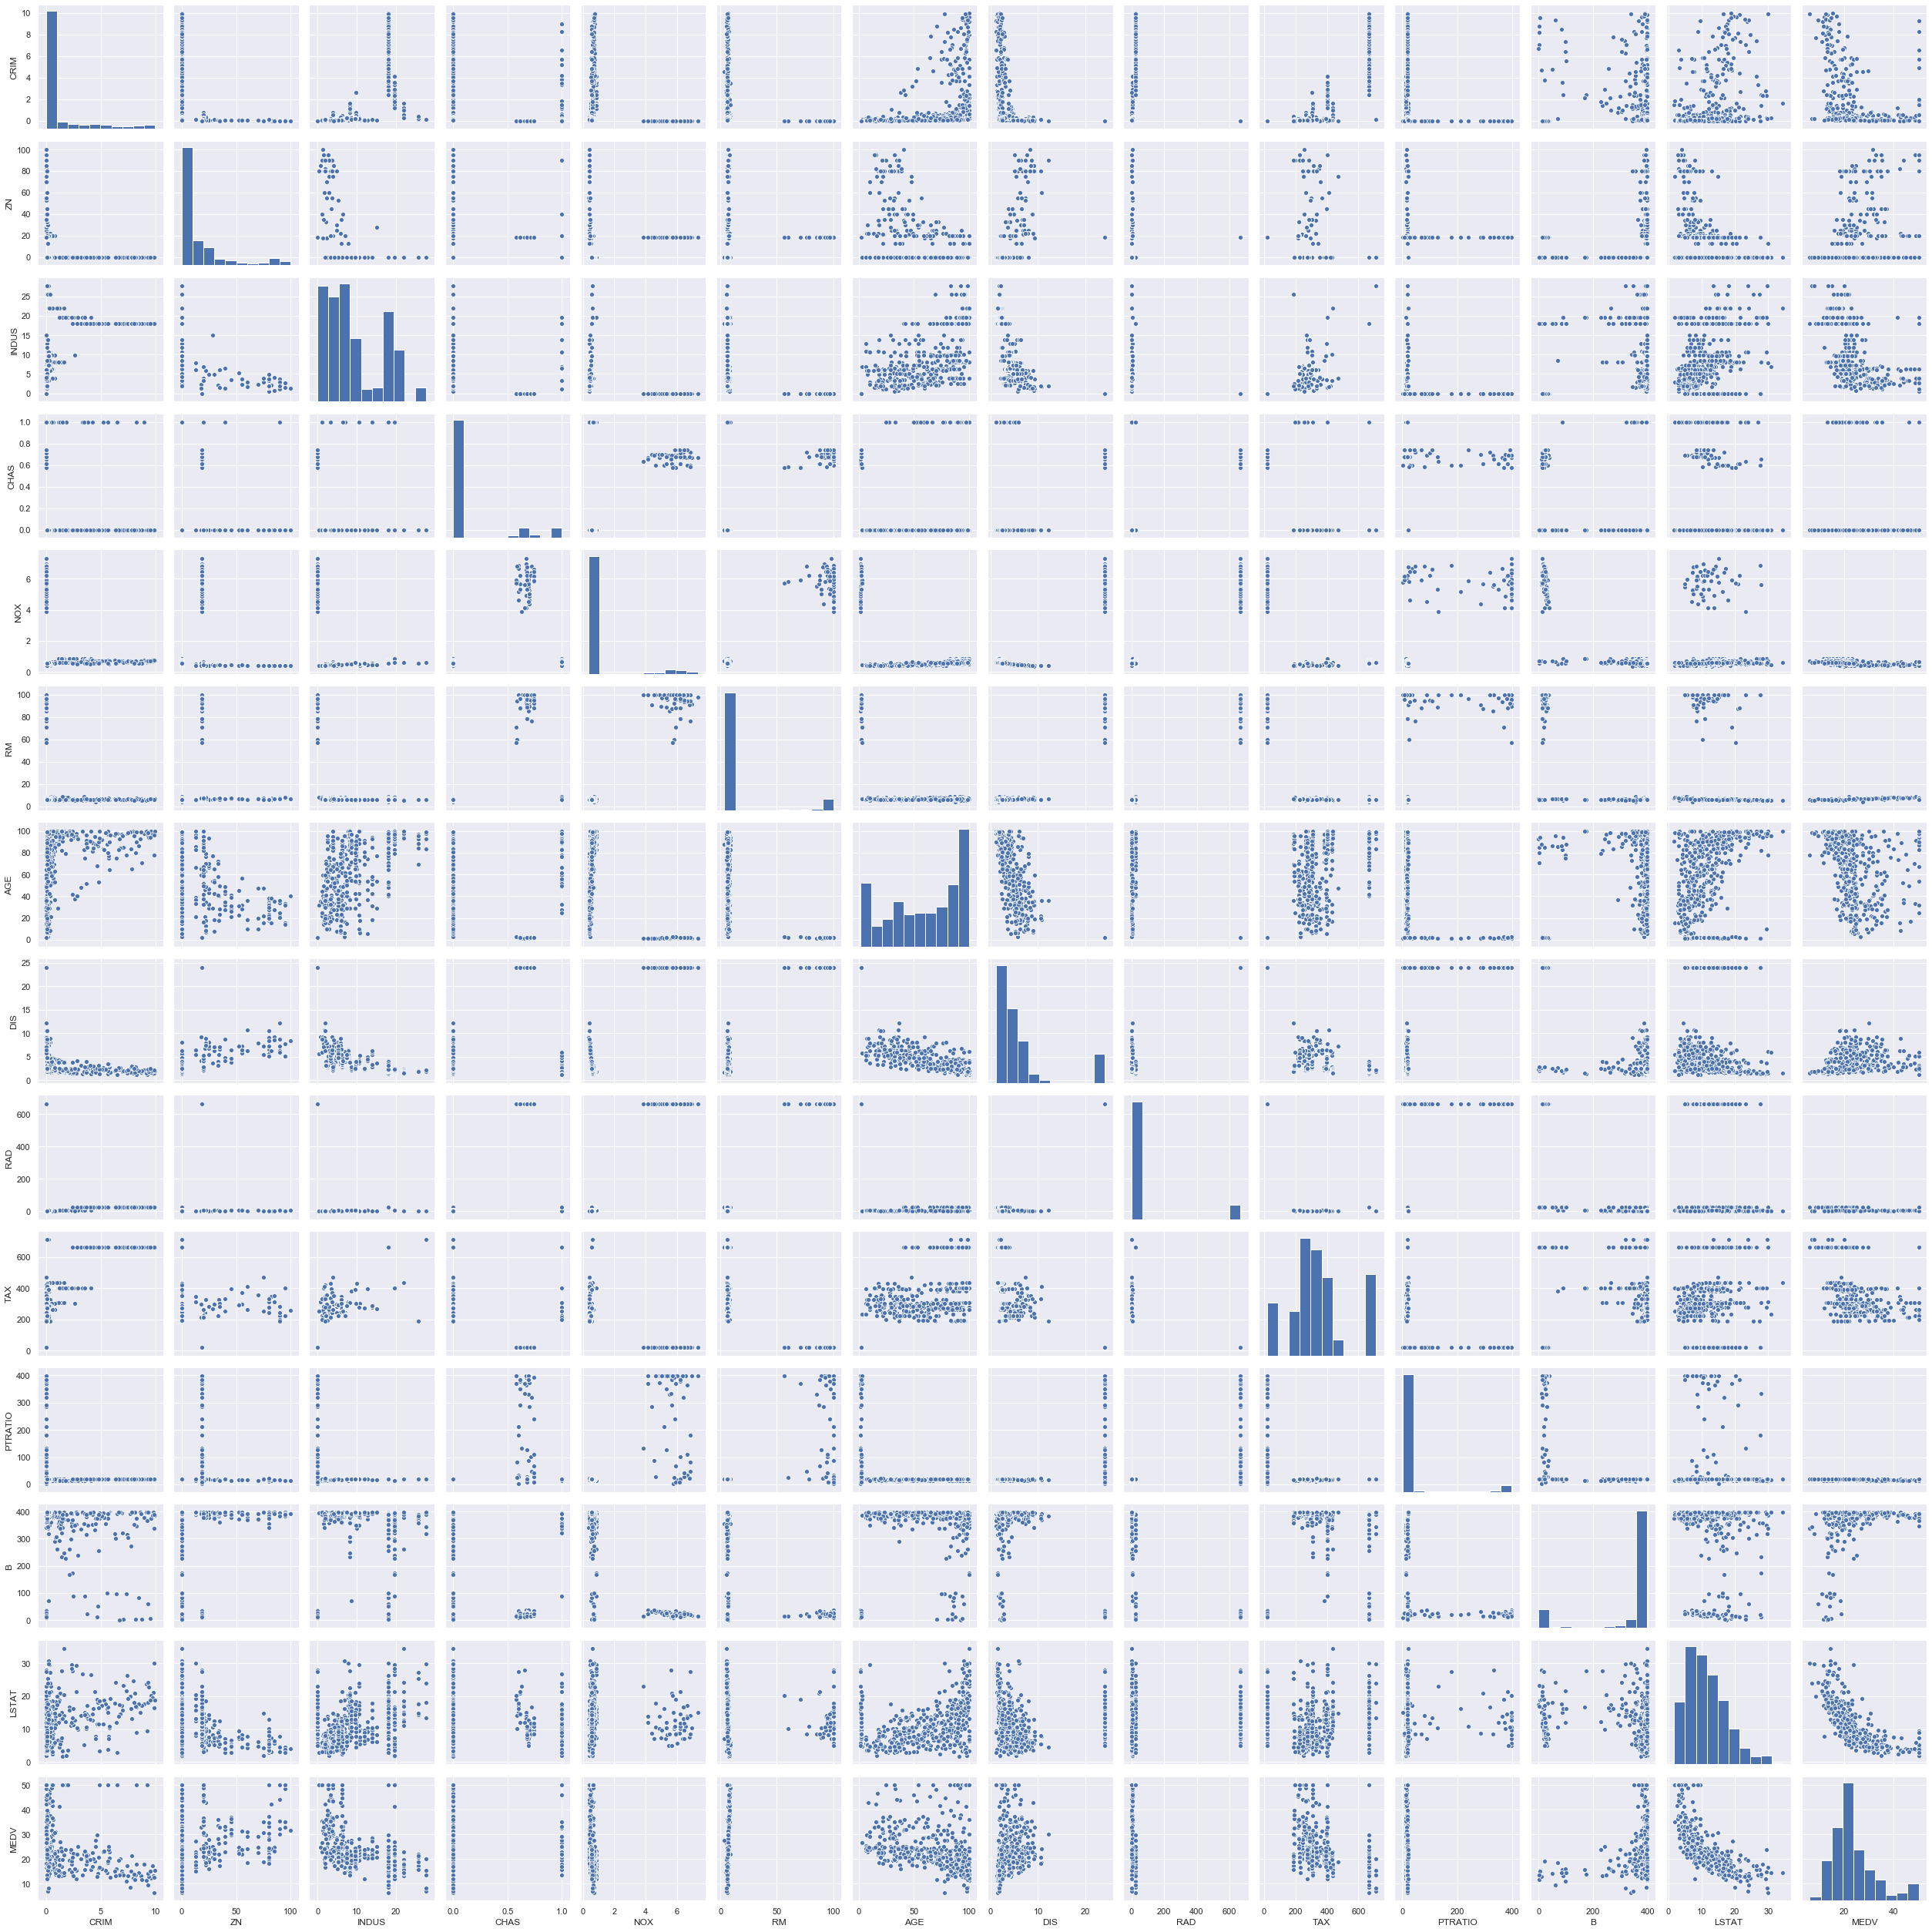

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

cols=['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.pairplot(df[cols], height=2.5)

#tight_layout is used to adjust spacing between subplots to minimize the overlaps.
plt.tight_layout()
plt.show()


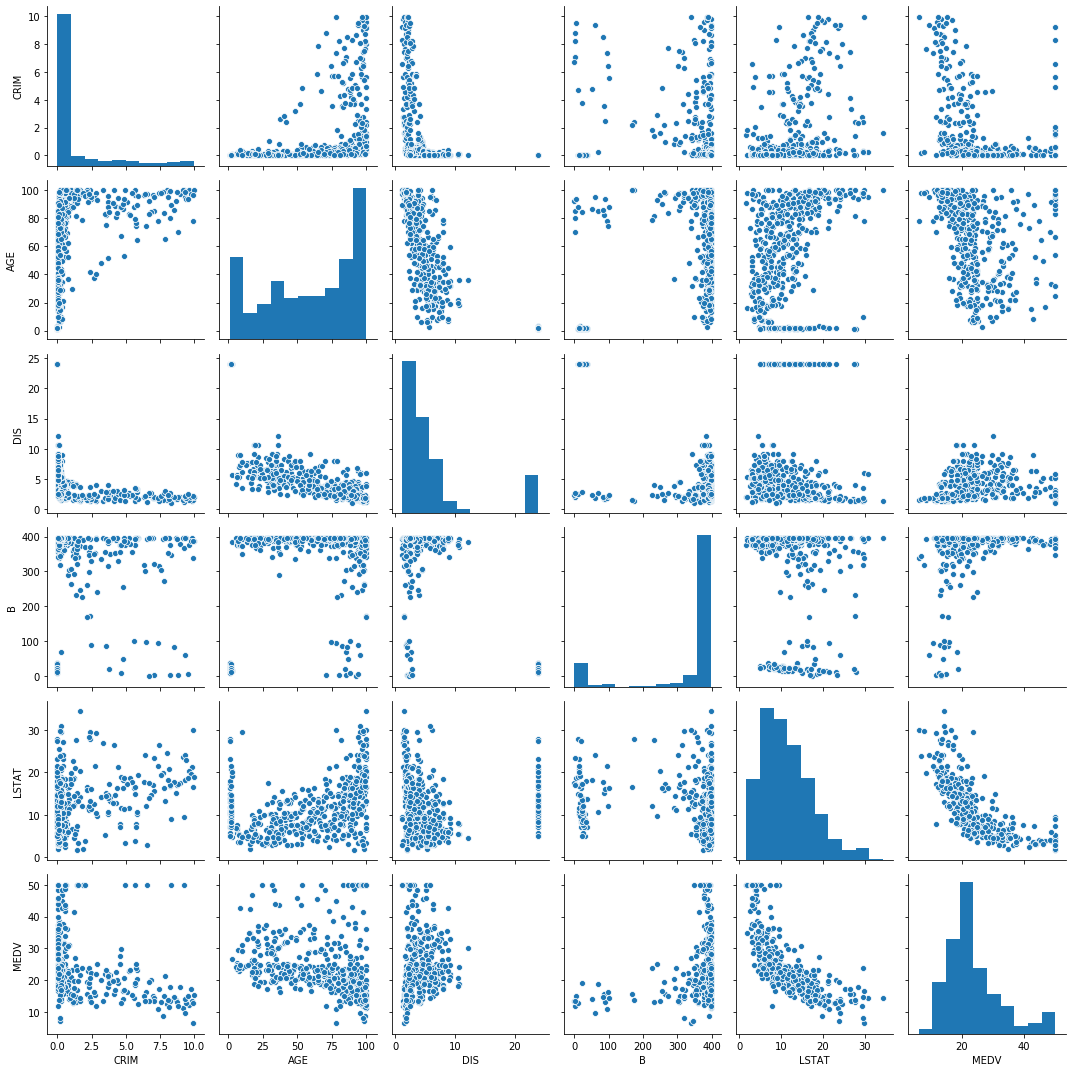

In [4]:
#ger rid of obviousily unrelated variables
cols1=['CRIM', 'AGE', 'DIS', 'B', 'LSTAT', 'MEDV']
sns.pairplot(df[cols1], height=2.5)
#tight_layout is used to adjust spacing between subplots to minimize the overlaps.
plt.tight_layout()
plt.show()

In [5]:
# Correlation
correlation = pd.DataFrame(df.corr())
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.288969,0.586719,-0.067536,-0.139448,-0.185045,0.462470,-0.312843,-0.151996,0.754362,-0.140015,-0.053260,0.392225,-0.286245
ZN,-0.288969,1.000000,-0.491587,-0.005843,0.038450,0.078721,-0.488006,0.268317,0.062767,-0.256799,0.049491,0.015810,-0.390092,0.331570
INDUS,0.586719,-0.491587,1.000000,-0.185873,-0.394483,-0.448809,0.700699,-0.605973,-0.427834,0.748951,-0.351166,0.233471,0.465583,-0.411915
CHAS,-0.067536,-0.005843,-0.185873,1.000000,0.585243,0.585447,-0.269616,0.523772,0.587673,-0.347552,0.470870,-0.495956,0.011260,0.154409
NOX,-0.139448,0.038450,-0.394483,0.585243,1.000000,0.975767,-0.550065,0.923503,0.985957,-0.570346,0.775302,-0.856608,0.079688,-0.332778
RM,-0.185045,0.078721,-0.448809,0.585447,0.975767,1.000000,-0.595786,0.946946,0.992620,-0.610962,0.806522,-0.848289,0.029450,0.740181
AGE,0.462470,-0.488006,0.700699,-0.269616,-0.550065,-0.595786,1.000000,-0.744068,-0.585574,0.635697,-0.477048,0.417216,0.414354,-0.299893
DIS,-0.312843,0.268317,-0.605973,0.523772,0.923503,0.946946,-0.744068,1.000000,0.947606,-0.689224,0.766224,-0.778075,-0.080368,0.138798
RAD,-0.151996,0.062767,-0.427834,0.587673,0.985957,0.992620,-0.585574,0.947606,1.000000,-0.586540,0.805556,-0.861694,0.056185,-0.217902
TAX,0.754362,-0.256799,0.748951,-0.347552,-0.570346,-0.610962,0.635697,-0.689224,-0.586540,1.000000,-0.485166,0.372806,0.284030,-0.345898


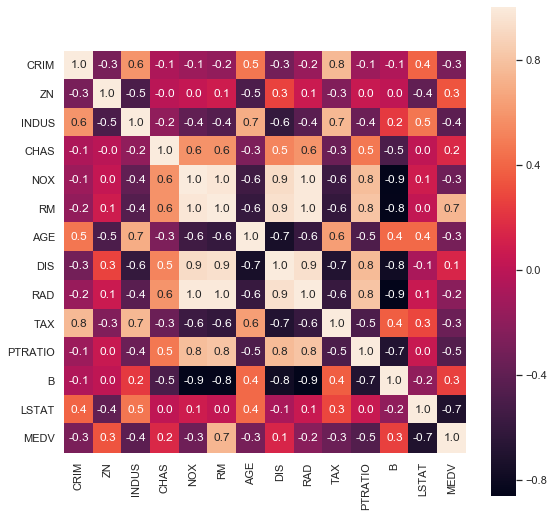

In [6]:

sns.set(style='whitegrid', context='notebook')
#chang the figure size bigger
plt.figure(figsize=(9,9))
hm = sns.heatmap(correlation,
                 linewidths=0,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.1f',
                 annot_kws={'size': 12},
                 yticklabels=df.columns,
                 xticklabels=df.columns)
#annot, means whether to display the number int the middle blocks
#fmt, adjust the accruatacy of the number  0.1f mean to 0.1, 
# annot_kws, adjust the size of number in the middle blocks
plt.show()

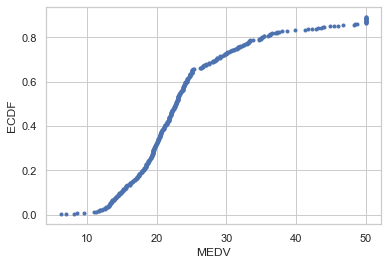

In [7]:
#ECDF plot
x = np.sort(df["MEDV"])
y = np.arange(1, len(x)+1) / len(x) 
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("MEDV")
plt.ylabel("ECDF")
plt.show()

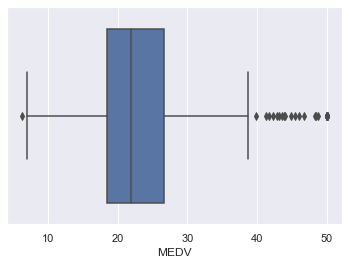

In [8]:
#box plot
sns.set()
sns.boxplot(df["MEDV"], data=df)
plt.show()

# PART II LINEAR REGRESSION WITH SKLEARN

In [9]:
df2 = pd.read_csv('housing2.csv')
#remove missing values
df2.dropna(inplace=True)
df2.head()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.038327,0.592379,0.655174,0.119839,0.652477,0.984323,0.206738,0.374650,0.463350,0.333610,...,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.225022,0.983103,0.803619,0.836315,0.163104,0.637497,0.008760,0.631190,0.207978,0.880357,...,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.423233,0.375808,0.271293,0.729824,0.886744,0.043703,0.457700,0.862450,0.901924,0.062488,...,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.743370,0.929103,0.589894,0.644012,0.110490,0.774604,0.306483,0.880599,0.630401,0.928894,...,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.378623,0.786609,0.712752,0.110274,0.762133,0.030069,0.316631,0.667073,0.426443,0.400557,...,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
# train-test split
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X=df2[['ATT1','ATT2','ATT3','ATT4','ATT5','ATT6','ATT7','ATT8','ATT9','ATT10','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']].values
y=df2['MEDV'].values
# Split the dataset into a training and a testing set
# Test set will be the 20% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (361, 19)
Shape of y_train:  (361,)
Shape of X_test:  (91, 19)
Shape of y_test:  (91,)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

slr = LinearRegression()
slr.fit(X_train,y_train)

print('coefficient: ', slr.coef_)
print('intercept: ', slr.intercept_)
print('R2 training: ', slr.score(X_train, y_train))
print('MSE training: ', mean_squared_error(slr.predict(X_train), y_train))
print('R2 testing : ', slr.score(X_test, y_test))
print('MSE testing : ', mean_squared_error(slr.predict(X_test), y_test))

coefficient:  [ 0.58974718 -0.07295271  0.33453946 -0.01725803 -0.06145717 -0.26869517
  0.00517825 -0.19072564 -0.08937786 -0.31166794 -1.38917701  3.84787837
 -0.68174953 -2.63740907  1.35814871 -1.11173071 -2.12552671  0.9802693
 -2.92628736]
intercept:  23.911911357340745
R2 training:  0.74954613275169
MSE training:  19.86523674870574
R2 testing :  0.6568934851612758
MSE testing :  23.804734142808773


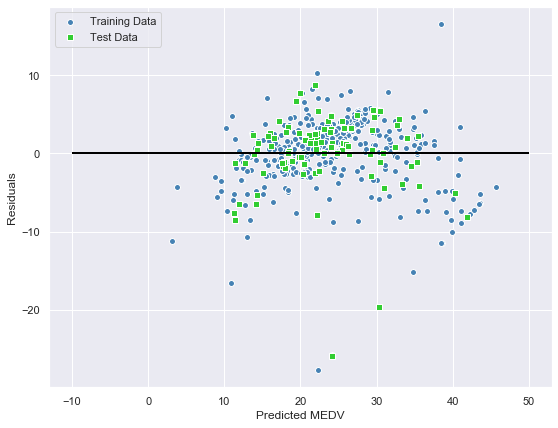

In [42]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

residual_train = y_train_pred-y_train
residual_test = y_test_pred-y_test
plt.figure(figsize=(9,7))
plt.scatter(y_train_pred, residual_train, c='steelblue', marker='o', edgecolor='white', label='Training Data')
plt.scatter(y_test_pred, residual_test, c='limegreen', marker='s', edgecolor='white', label='Test Data')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.hlines(y=0,xmin=-10,xmax=50, color='black',lw=2)
plt.legend(loc='upper left')
plt.show()

# PART III RIDGE & LASSO REGRESSION

## 1. RIDGE REGRESSION

In [50]:
from sklearn.linear_model import Ridge

min_test_mse = 10000
min_test_mse_list = []

for a in np.arange(0,100,0.01):
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    min_test_mse_list.append(mean_squared_error(ridge.predict(X_test), y_test))
    if mean_squared_error(ridge.predict(X_test), y_test) < min_test_mse:
        best_a = a
        min_test_mse = mean_squared_error(ridge.predict(X_test), y_test)
        coef = ridge.coef_
        intercept = ridge.intercept_
        train_R2 = ridge.score(X_train, y_train)
        test_R2 = ridge.score(X_test, y_test)
        train_mse = mean_squared_error(ridge.predict(X_train), y_train)

print('Lowest test MSE is ', min_test_mse)
print('Best Alpha is ', best_a)
print('coefficient: ', coef)
print('intercept: ', intercept)
print('R2 training: ', train_R2)
print('MSE training: ', train_mse)
print('R2 testing: ', test_R2)
print('MSE testing: ', min_test_mse)

Lowest test MSE is  23.61754672204112
Best Alpha is  22.240000000000002
coefficient:  [ 0.53128694 -0.10973091  0.31499827 -0.04711231 -0.07766656 -0.23889075
  0.01358097 -0.1762691  -0.08850643 -0.28895433 -1.04458758  3.74317528
 -0.56946322 -2.1581521   0.93934449 -0.85735852 -1.97807798  0.94356685
 -2.88666098]
intercept:  23.911911357340745
R2 training:  0.7472555930804947
MSE training:  20.046915368207692
R2 testing:  0.659591487297151
MSE testing:  23.61754672204112


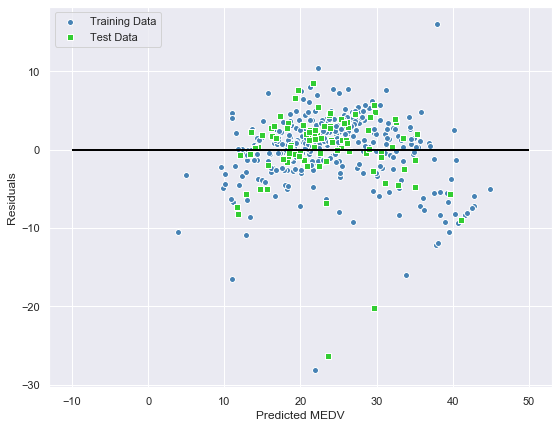

In [51]:
#plot the residuals
ridge_best = Ridge(alpha=22.24)
ridge_best.fit(X_train, y_train)

y_train_pred_ridge = ridge_best.predict(X_train)
y_test_pred_ridge = ridge_best.predict(X_test)

residual_train_ridge = y_train_pred_ridge - y_train
residual_test_ridge = y_test_pred_ridge - y_test
plt.figure(figsize=(9,7))
plt.scatter(y_train_pred_ridge, residual_train_ridge, c='steelblue', marker='o', edgecolor='white', label='Training Data')
plt.scatter(y_test_pred_ridge, residual_test_ridge, c='limegreen', marker='s', edgecolor='white', label='Test Data')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.hlines(y=0,xmin=-10,xmax=50, color='black',lw=2)
plt.legend(loc='upper left')
plt.show()

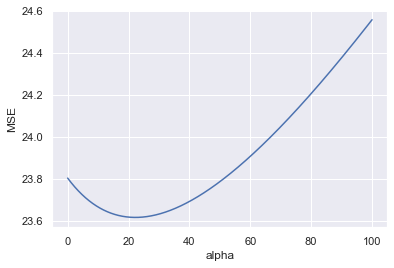

In [52]:
plt.plot(np.arange(0,100,0.01), min_test_mse_list)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

## 2. LASSO REGRESSION

In [53]:
from sklearn.linear_model import Lasso

min_test_mse = 10000
temp_min_test_mse_list = []

for a in np.arange(0,100,0.01):
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    temp_min_test_mse_list.append(mean_squared_error(lasso.predict(X_test), y_test))
    if mean_squared_error(lasso.predict(X_test), y_test) < min_test_mse:
        best_a = a
        min_test_mse = mean_squared_error(lasso.predict(X_test), y_test)
        coef = lasso.coef_
        intercept = lasso.intercept_
        train_R2 = lasso.score(X_train, y_train)
        test_R2 = lasso.score(X_test, y_test)
        train_mse = mean_squared_error(lasso.predict(X_train), y_train)

print('Lowest test MSE is ', min_test_mse)
print('Best Alpha is ', best_a)
print('coefficient: ', coef)
print('intercept: ', intercept)
print('R2 training: ', train_R2)
print('MSE training: ', train_mse)
print('R2 testing: ', test_R2)
print('MSE testing: ', min_test_mse)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3585.6752331413963, tolerance: 2.8633418781163433
  positive)


Lowest test MSE is  23.721899928303877
Best Alpha is  0.05
coefficient:  [ 0.53590464 -0.03390572  0.2894452  -0.         -0.03655589 -0.18732027
  0.         -0.14230621 -0.03626155 -0.2535704  -1.19528568  3.87161847
 -0.55975693 -2.36364685  0.94560968 -0.76842055 -2.03416347  0.93696274
 -2.97771148]
intercept:  23.911911357340745
R2 training:  0.7483988636520624
MSE training:  19.956234633980884
R2 testing:  0.6580874056007009
MSE testing:  23.721899928303877


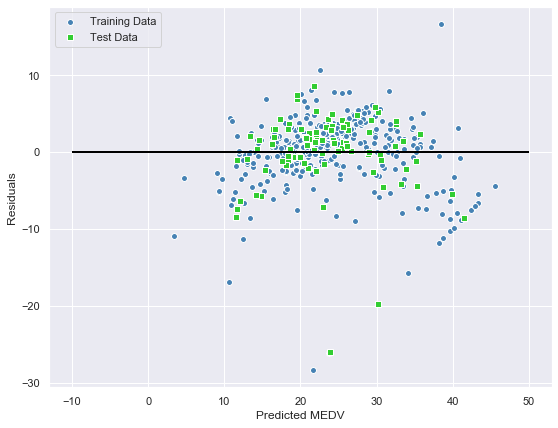

In [54]:
#plot the residuals
lasso_best = Lasso(alpha=0.05)
lasso_best.fit(X_train, y_train)

y_train_pred_lasso = lasso_best.predict(X_train)
y_test_pred_lasso = lasso_best.predict(X_test)

residual_train_lasso = y_train_pred_lasso - y_train
residual_test_lasso = y_test_pred_lasso - y_test
plt.figure(figsize=(9,7))
plt.scatter(y_train_pred_lasso, residual_train_lasso, c='steelblue', marker='o', edgecolor='white', label='Training Data')
plt.scatter(y_test_pred_lasso, residual_test_lasso, c='limegreen', marker='s', edgecolor='white', label='Test Data')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.hlines(y=0,xmin=-10,xmax=50, color='black',lw=2)
plt.legend(loc='upper left')
plt.show()

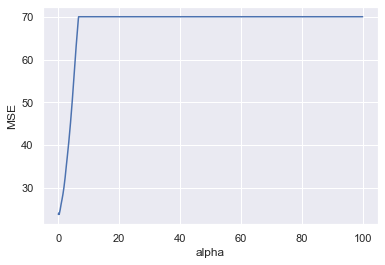

In [58]:
plt.plot(np.arange(0,100,0.01), temp_min_test_mse_list)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

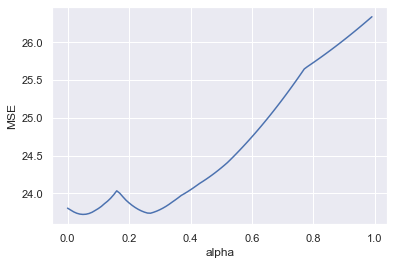

In [62]:
plt.plot(np.arange(0,1,0.01), temp_min_test_mse_list[:100])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

In [63]:
print("My name is Jie Qian")
print("My NetID is: jieqian2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Jie Qian
My NetID is: jieqian2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
